In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.Ticker("Gold")
df = df.history(period="5y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-30 00:00:00-05:00,16.183043,16.420383,16.112720,16.358850,9560900,0.0,0.0
2019-12-31 00:00:00-05:00,16.473116,16.552229,16.262148,16.341261,9210900,0.0,0.0
2020-01-02 00:00:00-05:00,16.446752,16.534656,16.147881,16.253365,7096800,0.0,0.0
2020-01-03 00:00:00-05:00,16.640132,16.666502,16.200615,16.323679,13759300,0.0,0.0
2020-01-06 00:00:00-05:00,16.684088,16.710459,16.147877,16.165457,14286900,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-20 00:00:00-05:00,15.300000,15.640000,15.160000,15.460000,27211100,0.0,0.0
2024-12-23 00:00:00-05:00,15.330000,15.610000,15.310000,15.590000,15753500,0.0,0.0
2024-12-24 00:00:00-05:00,15.600000,15.710000,15.500000,15.710000,9982100,0.0,0.0


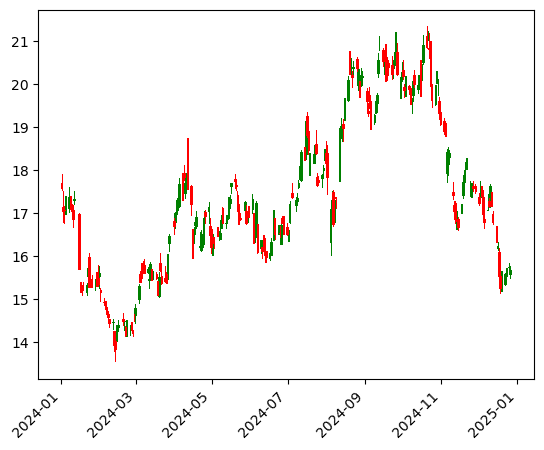

In [3]:
#Candle figure

dfc = df.loc["2024-01-01":].copy()
#create figure
plt.figure()

#define width of candlestick elements
width = 2
width2 = 1

#define up and down prices
up = dfc[dfc.Close>=dfc.Open]
down = dfc[dfc.Close<dfc.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()


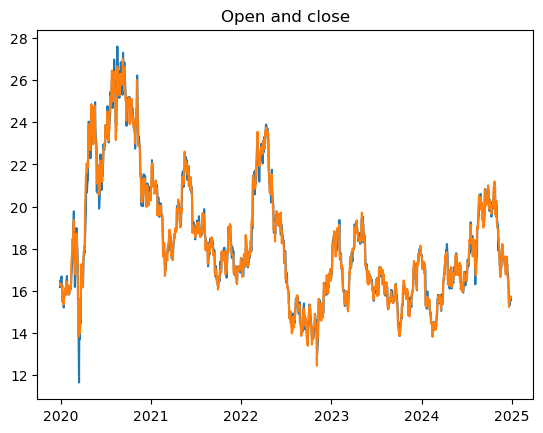

In [15]:
plt.figure()

#define colors to use
col1 = 'green'
col2 = 'red'
plt.title("Open and close")

plt.plot(df.Open)
plt.plot(df.Close)

plt.show()

In [4]:
def Engolfing_patern(df):
    open = df.Open.iloc[-1]
    close = df.Close.iloc[-1]
    previous_open = df.Open.iloc[-2]
    previous_close = df.Close.iloc[-2]

    # Bearish Pattern
    if (open>close and
    previous_open<previous_close and
    close<previous_open and
    open>=previous_close):
        return 1

    # Bullish Pattern
    elif (open<close and
        previous_open>previous_close and
        close>previous_open and
        open<=previous_close):
        return 2

    # No clear pattern
    else:
        return 0